In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px


In [2]:
df_mus= pd.read_csv('../source/data/liste-officielle-musees_clean.csv', sep =';')
df_mus=df_mus[['Département', 'Région administrative']]
df_mus = df_mus.groupby('Région administrative').size().reset_index(name='Nombre de musées')
df_mus

,Région administrative,Nombre de musées
0,Auvergne-Rhône-Alpes,129
1,Bourgogne-Franche-Comté,93
2,Bretagne,34
3,Centre-Val de Loire,57
4,Corse,9
5,Grand Est,116
6,Hauts-de-France,82
7,Normandie,87
8,Nouvelle-Aquitaine,97
9,Occitanie,121


In [3]:
df_pop = pd.read_csv('../source/data/Population France par dpt 2024.csv', sep =';')
# Remove spaces and convert columns to integers
for col in ['Total Homme', 'Total Femme', 'Total']:
    df_pop[col] = df_pop[col].str.replace(' ', '').astype(int)
df_pop

,Code département,Départements,Total Homme,Total Femme,Total
0,1,Ain,335768,343730,679498
1,2,Aisne,255520,266112,521632
2,3,Allier,160253,172455,332708
3,4,Alpes-de-Haute-Provence,81346,86815,168161
4,5,Hautes-Alpes,68668,72993,141661
...,...,...,...,...,...
96,971,Guadeloupe,172924,205637,378561
97,972,Martinique,159707,190218,349925
98,973,Guyane,142442,152943,295385
99,974,La Réunion,421072,464628,885700


In [4]:
df_reg = pd.read_csv('../source/data/departements-regions-france.csv', sep =',')
df_reg

,code_departement,nom_departement,code_region,nom_region
0,01,Ain,84,Auvergne-Rhône-Alpes
1,02,Aisne,32,Hauts-de-France
2,03,Allier,84,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,93,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,93,Provence-Alpes-Côte d'Azur
...,...,...,...,...
96,971,Guadeloupe,1,Territoires et départements d'outre-mer
97,972,Martinique,2,Territoires et départements d'outre-mer
98,973,Guyane,3,Territoires et départements d'outre-mer
99,974,La Réunion,4,Territoires et départements d'outre-mer


In [5]:
df_pop_clean = pd.merge(df_pop, df_reg, left_on ='Départements', right_on = 'nom_departement')                   
df_pop_clean = df_pop_clean[['Code département','Départements','Total Homme', 'Total Femme', 'Total','code_region', 'nom_region']]
df_pop_reg_clean = df_pop_clean[['Total Homme', 'Total Femme', 'Total','code_region', 'nom_region']]
df_pop_reg_clean = df_pop_reg_clean.groupby('nom_region').sum().reset_index()
df_pop_reg_clean

,nom_region,Total Homme,Total Femme,Total,code_region
0,Auvergne-Rhône-Alpes,4012350,4223573,8235923,1008
1,Bourgogne-Franche-Comté,1362040,1429679,2791719,216
2,Bretagne,1682034,1770989,3453023,212
3,Centre-Val de Loire,1251595,1321700,2573295,144
4,Corse,172277,183251,355528,188
5,Grand Est,2718206,2850505,5568711,440
6,Hauts-de-France,2901724,3082099,5983823,160
7,Normandie,1612697,1714380,3327077,140
8,Nouvelle-Aquitaine,2966799,3187973,6154772,900
9,Occitanie,2976720,3178009,6154729,988


In [6]:

df_pop_reg_clean.to_csv('../source/data/population France par dpt et region_clean.csv', sep =';')

In [7]:
df_merge = pd.merge(df_pop_reg_clean, df_mus, left_on ='nom_region', right_on = 'Région administrative')
                       
df_merge = df_merge[['nom_region','Total Homme', 'Total Femme', 'Total','code_region', 'Nombre de musées']]

df_merge = df_merge.sort_values(by='Total', ascending = False)

Text(0.5, 1.0, 'Population vs Nombre de Musées par Région (avec double axe Y)')

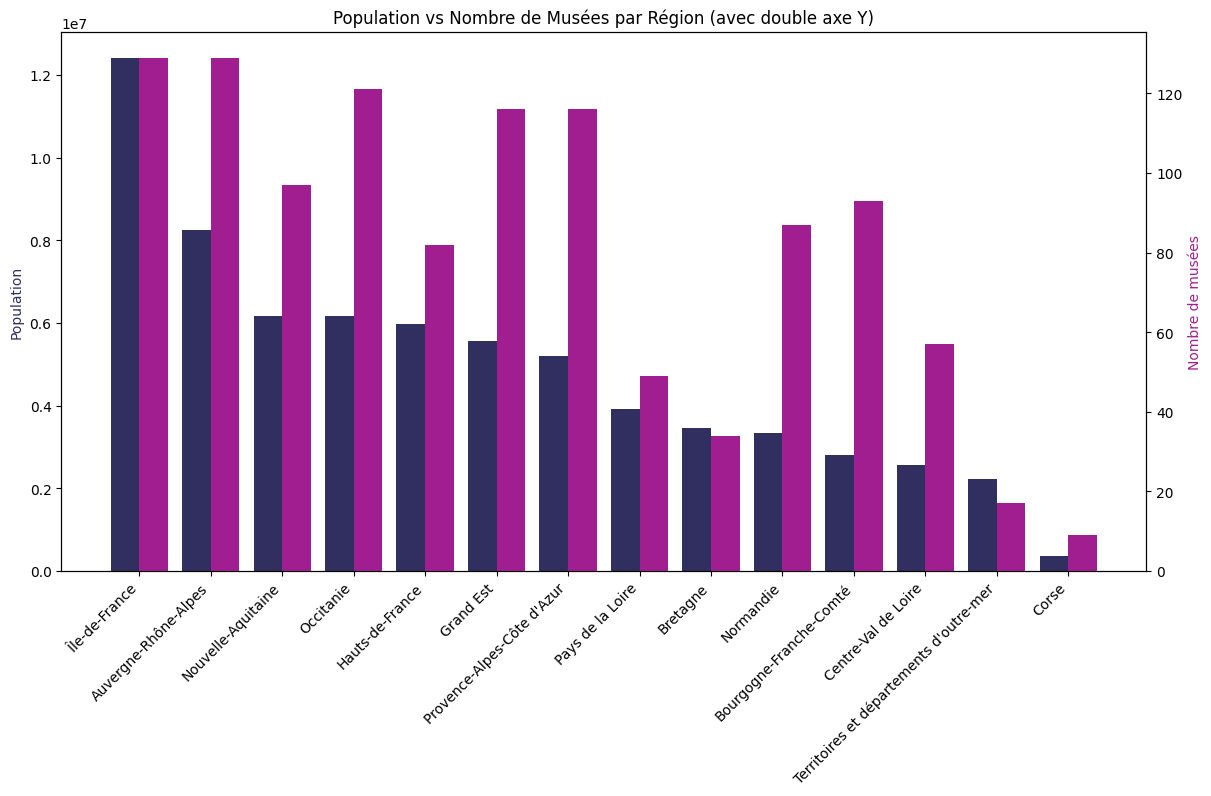

In [8]:

df = df_merge
# Position des barres
x = np.arange(len(df_merge))
width = 0.4

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Axe secondaire
ax2 = ax1.twinx()

# Barres population (axe gauche)
bars1 = ax1.bar(x - width/2, df['Total'], width, label='Population', color="#312E60")

# Barres musées (axe droit)
bars2 = ax2.bar(x + width/2, df_merge['Nombre de musées'], width, label='Nombre de musées', color="#A01E90")

# Configuration des axes
ax1.set_ylabel("Population", color="#312E60")
ax2.set_ylabel("Nombre de musées", color="#A01E90")
ax1.set_xticks(x)
ax1.set_xticklabels(df_merge['nom_region'], rotation=45, ha='right')
ax1.set_title("Population vs Nombre de Musées par Région (avec double axe Y)")

In [9]:

df_BLEC = pd.read_csv('../source/data/base-des-lieux-et-des-equipements-culturels_clean.csv', sep =';')
df_BLEC =df_BLEC[['Type équipement ou lieu','Demographie_AP']]
df_BLEC = df_BLEC.groupby('Type équipement ou lieu').size().reset_index(name="Nombre d'équipement")
df_BLEC = df_BLEC.drop(index = [7, 9, 10, 11, 14, 15, 17, 19])

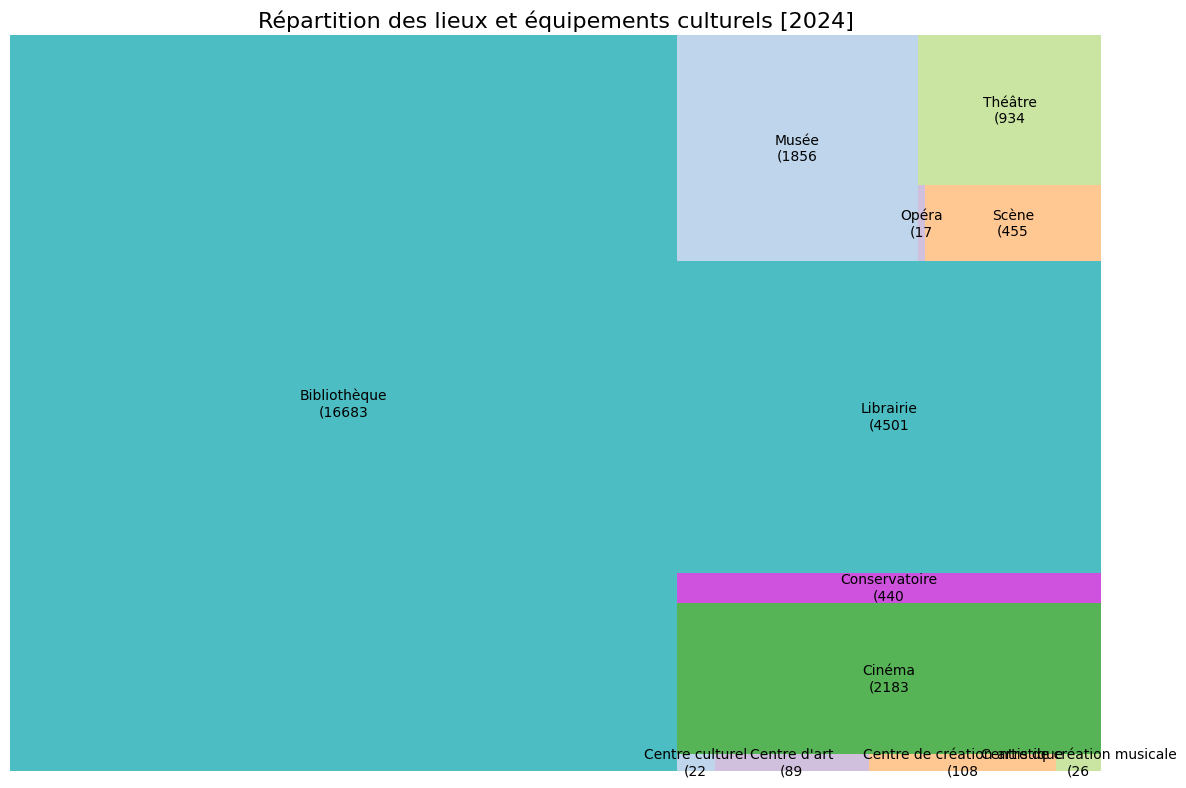

In [10]:
import matplotlib.pyplot as plt
import squarify 

labels = df_BLEC['Type équipement ou lieu']

values = df_BLEC["Nombre d'équipement"]

colors = [
    "#1fadb4", "#aecbe8", "#c5b0d5",
    "#ffbb78", "#bcdf8a", "#2ca02c", "#c227d6"
]


plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=values,
    label=[f"{l}\n({v}" for l, v in zip(labels, values)],
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize':10}
)
plt.axis('off')
plt.title("Répartition des lieux et équipements culturels [2024]", fontsize=16)
plt.tight_layout()


In [11]:
df_cine = pd.read_csv('../source/data/cinema_clean.csv', sep =';')
df_cine = df_cine.groupby('code_departement').size().reset_index(name='Nombre de cinés')
df_cine = df_cine.drop(index= [96])

#jointure nombre de ciné et nom de region et  groupby par region

df_cine_reg = pd.merge(df_cine, df_reg, left_on ='code_departement', right_on = 'code_departement')
df_cine_reg = df_cine_reg[['nom_region', 'Nombre de cinés']]
df_cine_reg = df_cine_reg.groupby('nom_region').sum().reset_index()

# création ligne domtom
new_row = pd.DataFrame([{
    'nom_region': "Territoires et départements d'outre-mer",
    'Nombre de cinés': 0  
}])

# Ajout ligne domtom
df_cine_reg = pd.concat([df_cine_reg, new_row], ignore_index=True)


In [12]:
# Décompte festival par région et remplacement des dom ton par nom de region

df_festival = pd.read_csv('../source/data/festivals_nettoye.csv', sep =';')

domtom = [
    "Guadeloupe",
    "Guyane",
    "La Réunion",
    "Martinique",
    "Mayotte",
    "Nouvelle-Calédonie",
    "Polynésie française",
    "Saint-Barthélemy",
    "Saint-Pierre-et-Miquelon"
]

df_festival['Région principale de déroulement'] = df_festival['Région principale de déroulement'].replace(domtom, "Territoires et départements d'outre-mer")

df_festival = df_festival.groupby('Région principale de déroulement').size().reset_index(name='Nombre de festivals')


In [13]:
df_biblio = pd.read_csv('../source/data/adresses_des_bibliotheques_publiques_prepared.csv', sep =',')

#detection de toutes les ligne NA
df_biblio.isna().sum()

#Detection de la lgne NA dans la colonne Dpt
df_biblio[df_biblio['Département'].isna()]

# Changement du NA par le nom de dpt correspondant au CP 973
df_biblio['Département'] = df_biblio['Département'].fillna('Guyane')


In [14]:
df_biblio = pd.read_csv('../source/data/adresses_des_bibliotheques_publiques_prepared.csv', sep =',')

df_biblio = df_biblio.groupby('Département').size().reset_index(name='Nombre de bibliothèques')

#jointure bibliotheque _ région

df_biblio_reg = pd.merge(df_biblio, df_reg, left_on ='Département', right_on = 'nom_departement')

df_biblio_reg = df_biblio_reg[['Département', 'Nombre de bibliothèques', 'nom_region']]

df_biblio_reg

#changement nom de dpt domtom et groupby region

domtom = [
    "Guadeloupe",
    "Guyane",
    "La Réunion",
    "Martinique",
    "Mayotte",
    "Nouvelle-Calédonie",
    "Polynésie française",
    "Saint-Barthélemy",
    "Saint-Pierre-et-Miquelon"
]

df_biblio_reg['nom_region'] = df_biblio_reg['nom_region'].replace(domtom, "Territoires et départements d'outre-mer")

df_biblio_reg = df_biblio_reg.groupby('nom_region').sum().reset_index()

df_biblio_reg = df_biblio_reg[['nom_region', 'Nombre de bibliothèques']]

In [15]:
df_final = pd.merge(df_merge, df_cine_reg, left_on='nom_region', right_on ='nom_region')
df_final = pd.merge(df_final, df_festival, left_on='nom_region', right_on ='Région principale de déroulement')
df_final = pd.merge(df_final, df_biblio_reg, left_on='nom_region', right_on = 'nom_region')

df_final = df_final[['nom_region','code_region','Total','Nombre de musées', 'Nombre de cinés', 'Nombre de festivals','Nombre de bibliothèques']]

df_final = df_final.sort_values('Total', ascending = False)

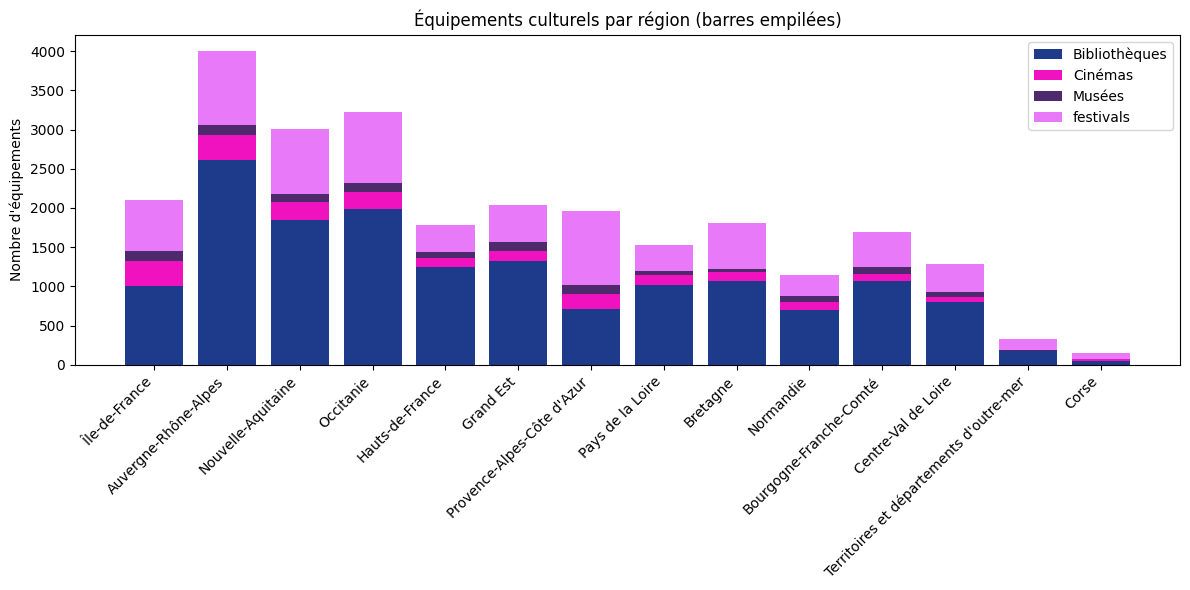

In [16]:

df = df_final 

# Coordonnées sur l'axe des x

regions = df_final['nom_region']

x = np.arange(len(regions))

# Hauteurs des différentes catégories

biblio = df_final['Nombre de bibliothèques']
cine = df_final['Nombre de cinés']
musee = df_final['Nombre de musées']
festivals = df_final['Nombre de festivals']

# Création du graphique
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x, biblio, label = 'Bibliothèques', color = "#1E3A8A" )
ax.bar(x, cine, bottom = biblio, label='Cinémas', color = "#F012BE")
ax.bar(x, musee, bottom = biblio + cine , label='Musées', color ="#4D2A6C" )
ax.bar(x, festivals, bottom = biblio + cine + musee, label='festivals', color = "#E879F9")

# Personnalisation
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45, ha='right')
ax.set_ylabel("Nombre d'équipements")
ax.set_title("Équipements culturels par région (barres empilées)")
ax.legend()

plt.tight_layout()
plt.show()

In [17]:
# Créer la figure
import plotly.graph_objects as go
fig = go.Figure()

# Barres : Entrées (millions)

fig.add_trace(go.Bar(
    x=df_final["nom_region"],
    y=df_final["Total"],
    name="Populations",
    yaxis="y1",
    marker_color="#1E3A8A"
))
# Courbe : bibliotheque
fig.add_trace(go.Scatter(
    x=df_final["nom_region"],
    y=df_final["Nombre de bibliothèques"],
    name="bibliothèques",
    yaxis="y2",
    mode="lines+markers",
    line=dict(color="#F012BE", width=3)
    ))
# Courbe : Cinés
fig.add_trace(go.Scatter(
    x=df_final["nom_region"],
    y=df_final["Nombre de cinés"],
    name="cinés",
    yaxis="y2",
    mode="lines+markers",
    line=dict(color="#E879F9", width=3)
))
# Courbe : musées
fig.add_trace(go.Scatter(
    x=df_final["nom_region"],
    y=df_final["Nombre de musées"],
    name="musées",
    yaxis="y2",
    mode="lines+markers",
    line=dict(color='#FF69B4', width=3)
))
# Courbe : festivals
fig.add_trace(go.Scatter(
    x=df_final["nom_region"],
    y=df_final["Nombre de festivals"],
    name="festivals",
    yaxis="y2",
    mode="lines+markers",
    line=dict(color='#FFB6C1', width=3)
))
#Mise en page
fig.update_layout(
    title="Population et lieux culturels",
    xaxis=dict(title="Région"),
    yaxis=dict(
        title=dict(text="Population)", font=dict(color="royalblue")),
        tickfont=dict(color="royalblue")
    ),
    yaxis2=dict(
        overlaying="y",
        side="right"
    ),
    legend=dict(x=1, y=1),
    bargap=0.2
)





In [18]:
df_freq_mus = pd.read_csv('../source/data/frequentation-des-musees-de-france.csv', sep = ';')
df_freq_mus = df_freq_mus[['REGION','TOTAL','ANNEE']]
df_freq_mus = df_freq_mus.groupby(['REGION', 'ANNEE']).sum().reset_index()
df_freq_mus['REGION'] = df_freq_mus['REGION'].str.capitalize()


In [19]:
df_final = df_final[['Nombre de musées','Nombre de cinés','Nombre de festivals','Nombre de bibliothèques']]
df_final.loc['Total'] = df_final.sum()

df_final= df_final.drop(index=range(0, 14))

df_transposed = df_final.T
df_transposed



/tmp/ipykernel_1452299/4087145164.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Total
Nombre de musées,1136
Nombre de cinés,2053
Nombre de festivals,7283
Nombre de bibliothèques,15598


In [20]:
import plotly.express as px
import streamlit as st


# Réinitialiser l’index pour que les lignes deviennent une colonne
df_plot = df_transposed.reset_index()
df_plot.columns = ['Type équipement', 'Total']

# Création du camembert
fig = px.pie(
    df_plot,
    names='Type équipement',
    values='Total',
    title="Répartition des équipements culturels",
    color_discrete_sequence=["#312E60", "#852284", "#D816A8", "#FF339C"]
)
fig.show()
st.plotly_chart(fig)

2025-08-14 06:06:55.516 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:55.517 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:55.519 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:55.825 
  command:

    streamlit run /root/.pyenv/versions/offre_culturelle/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-08-14 06:06:55.826 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:55.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [21]:
df_festival = pd.read_csv('../source/data/festivals_nettoye.csv', sep =';')

domtom = [
    "Guadeloupe",
    "Guyane",
    "La Réunion",
    "Martinique",
    "Mayotte",
    "Nouvelle-Calédonie",
    "Polynésie française",
    "Saint-Barthélemy",
    "Saint-Pierre-et-Miquelon"
]

df_festival['Région principale de déroulement'] = df_festival['Région principale de déroulement'].replace(domtom, "Territoires et départements d'outre-mer")

df_festival_reg = df_festival.groupby('Région principale de déroulement').size().reset_index(name='Nombre de festivals')


In [41]:
# Créer le treemap interactif avec style personnalisé

fig = px.treemap(
    df_festival_reg,
    path=['Région principale de déroulement'],
    values='Nombre de festivals',
    title=":clapper: Treemap Interactif - Festivals par Région :clapper:",
    hover_data={'Nombre de festivals': ':,'}
)
import plotly.graph_objects as go
fig.update_traces(
    texttemplate="<b>%{label}</b><br>━━━━━━━<br>%{value} Festivals",
    textfont_size=13,
    textfont_color="white",  # Changé en noir pour contraster avec le fond blanc
    textfont_family="Arial Black",
    hovertemplate="<b>%{label}</b><br>" +
                  "Nombre de festivals: %{value}<br>" +
                  "Pourcentage: %{percentParent}<br>" +
                  "<extra></extra>",
    marker_colors=None
)
# Définir les couleurs personnalisées pour le dégradé
custom_colors = ['#0B1426', '#1E3A8A', '#3B82F6', '#6366F1', '#8B5CF6', 
                '#A855F7', '#C084FC',  '#EC4899', '#F012BE']
               
# Appliquer les couleurs
fig.update_traces(
    marker_colorscale=[[i/(len(custom_colors)-1), color] for i, color in enumerate(custom_colors)],
    marker_cmid=df['Nombre de festivals'].mean()
)
fig.update_layout(
    title="Treemap Interactif - Festivals par Région",
    title_font_size=15,
    title_x=0,                 # 0 = aligné à gauche, 0.5 = centré, 1 = aligné à droite
    title_font_color="black",
    title_font_family="Arial Black",
    margin=dict(t=80, l=25, r=25, b=25),
    font_size=14,
    font_color="black",        # Force toute la police en noir
    plot_bgcolor="white",      # Fond blanc
    paper_bgcolor="white",     # Fond blanc
    width=None,                # Permet l'adaptation automatique
    height=600,                # Hauteur fixe raisonnable pour Streamlit
    autosize=True,             # Active le redimensionnement automatique
    # Forcer le fond blanc même avec les thèmes sombres
    template="plotly_white",   # Template blanc par défaut
    annotations=[
        dict(
            text=f"Total: {df['Nombre de festivals'].sum()} festivals | Moyenne: {df['Nombre de festivals'].mean():.0f} par région",
            showarrow=False,
            x=0.5, y=0.02,
            xref="paper", yref="paper",
            xanchor="center", yanchor="bottom",
            font=dict(size=12, color="gray", style="italic")  # Changé en gris foncé pour la lisibilité
        )
    ]
)
#afficher le graphique numero 1
fig.show()

In [24]:
df_festival = pd.read_csv('../source/data/festivals_nettoye.csv', sep =';')

domtom = [
    "Guadeloupe",
    "Guyane",
    "La Réunion",
    "Martinique",
    "Mayotte",
    "Nouvelle-Calédonie",
    "Polynésie française",
    "Saint-Barthélemy",
    "Saint-Pierre-et-Miquelon"
]

df_festival['Région principale de déroulement'] = df_festival['Région principale de déroulement'].replace(domtom, "Territoires et départements d'outre-mer")
df_plot = df_festival['Discipline dominante'].value_counts().reset_index()
df_plot.columns = ['Discipline dominante', 'Nombre de festivals']

# Création du camembert
fig = px.pie(
    df_plot,
    names='Discipline dominante',
    values='Nombre de festivals',
    title="Répartition des types de festivals",
    color_discrete_sequence=["#312E60", "#852284", "#D816A8", "#FF339C"]
)
fig.show()
st.plotly_chart(fig)

2025-08-14 06:06:56.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:56.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:56.443 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:56.445 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:56.446 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
# Titre
st.title("Carte interactive des festivals en France")

# Chargement des données
# df = pd.read_csv("ton_fichier.csv", sep=";")  # adapte le nom du fichier et le séparateur si besoin

# Séparer les coordonnées
df_festival[['lat', 'lon']] = df_festival['Géocodage xy'].str.split(',', expand=True).astype(float)
df_festival['lat'] = pd.to_numeric(df_festival['lat'], errors='coerce')
df_festival['lon'] = pd.to_numeric(df_festival['lon'], errors='coerce')

# Suppression des lignes sans coordonnées valides
df_festival = df_festival.dropna(subset=['lat', 'lon'])

# Carte interactive
fig = px.scatter_map(
    df_festival,
    lat='lat',
    lon='lon',
    hover_name='Nom du festival',
    hover_data=['Région principale de déroulement', 'Discipline dominante'],
    color='Discipline dominante',
    color_discrete_sequence=["#312E60", "#852284", "#D816A8", "#FF339C", '#3B82F6', '#6366F1', '#8B5CF6'],
    zoom=4,
    height=700
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

regions = df_festival['Région principale de déroulement'].dropna().unique()
choix_region = st.selectbox("Choisir une région", ["Toutes"] + sorted(regions.tolist()))

if choix_region != "Toutes":
    df_festival = df_festival[df_festival["Région principale de déroulement"] == choix_region]

fig.update_layout(
    mapbox_center={"lat": df_festival["lat"].mean(), "lon": df_festival["lon"].mean()},
    mapbox_zoom=5
)


fig.show()
st.plotly_chart(fig)


2025-08-14 06:06:56.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:56.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:56.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:56.863 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:56.865 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:56.868 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:56.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:56.873 Session state does not function when running a script without `streamlit run`
2025-08-14 06:06

2025-08-14 06:06:57.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:57.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:57.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:57.078 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 06:06:57.079 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [38]:
df = pd.merge(df_festival_reg, df_pop_reg_clean, left_on = 'Région principale de déroulement' , right_on='nom_region')
df = df[['nom_region','Nombre de festivals', 'Total']]

#Calcul du ratio festival par million d'habitants

df['festivals_par_million'] = df['Nombre de festivals'] / (df['Total'] / 1_000_000)

# Trie décroissant du ratio
df_sorted = df.sort_values(by='festivals_par_million', ascending=False)

# Dégradé de couleurs personnalisé (mêmes tons que Matplotlib)
colors = [
    "#0F0E23", "#1C1A3C", "#2B2760", "#312E60", "#443F77", "#5A4E8A", "#70549D",
    "#8C66AE", "#A878BE", "#C28ACD", "#D89BD9", "#E7ADD8", "#F3C0E1", "#FCD3EC"
]
fig = px.bar(
    df_sorted,
    x='festivals_par_million',
    y='nom_region',
    orientation='h',
    color='nom_region',
    color_discrete_sequence=colors,
    labels={'festivals_par_million': 'Festivals par million d\'habitants', 'nom_region': 'Région'},
    title='🎉 Ratio festivals / population par région'
)

fig.update_layout(
    height=700,
    xaxis_title='Festivals par million d\'habitants',
    yaxis_title='',
    showlegend=False,
    margin=dict(l=100, r=40, t=80, b=40)
)
fig.show()

In [44]:
df_festival = pd.read_csv('../source/data/festivals_nettoye.csv', sep =';')

domtom = [
    "Guadeloupe",
    "Guyane",
    "La Réunion",
    "Martinique",
    "Mayotte",
    "Nouvelle-Calédonie",
    "Polynésie française",
    "Saint-Barthélemy",
    "Saint-Pierre-et-Miquelon"
]

df_festival['Région principale de déroulement'] = df_festival['Région principale de déroulement'].replace(domtom, "Territoires et départements d'outre-mer")

colonnes_a_supprimer = [
    'Code postal (de la commune principale de déroulement)',
    'Département principal de déroulement',
    'Période principale de déroulement du festival'
]

df_festival = df_festival.drop(columns=colonnes_a_supprimer)

#df_festival = df_festival.groupby('Année de création du festival').sum().reset_index()

In [61]:
df_festival = pd.read_csv('../source/data/festivals_nettoye.csv', sep =';')

domtom = [
    "Guadeloupe",
    "Guyane",
    "La Réunion",
    "Martinique",
    "Mayotte",
    "Nouvelle-Calédonie",
    "Polynésie française",
    "Saint-Barthélemy",
    "Saint-Pierre-et-Miquelon"
]

df_festival['Région principale de déroulement'] = df_festival['Région principale de déroulement'].replace(domtom, "Territoires et départements d'outre-mer")

colonnes_a_supprimer = [
    'Code postal (de la commune principale de déroulement)',
    'Département principal de déroulement'
]

df_festival = df_festival.drop(columns=colonnes_a_supprimer)

df_festival['Période principale de déroulement du festival'].unique()


array(['Saison (21 juin - 5 septembre)',
       'Après-saison (6 septembre - 31 décembre)',
       'Avant-saison (1er janvier - 20 juin)', nan, 'Mars',
       'saison (21 juin - 5 septembre)', 'Variable selon les années',
       'avant-saison (1er janvier - 20 juin)', 'Octobre',
       'Janvier, Octobre, Novembre', 'Juin', 'Juillet',
       'Janvier, Février, Mars, Avril, Mai, Juin, Juillet, Août',
       'Décembre', 'Mai', 'Novembre', 'Avril', 'Septembre',
       'après-saison (6 septembre - 31 décembre)', 'Ocotbre', 'Août',
       'Février', 'Période variable selon les territoires'], dtype=object)

array(['saison (21 juin - 5 septembre)',
       'après-saison (6 septembre - 31 décembre)',
       'avant-saison (1er janvier - 20 juin)', 'inconnue', 'mars',
       'variable', 'octobre', 'janvier, octobre, novembre', 'juin',
       'juillet',
       'janvier, février, mars, avril, mai, juin, juillet, août',
       'décembre', 'mai', 'novembre', 'avril', 'septembre', 'août',
       'février'], dtype=object)

In [ ]:


# 1. Remplacer les valeurs manquantes par une valeur standard
df_festival['Période principale de déroulement du festival'] = df_festival['Période principale de déroulement du festival'].fillna('Inconnue')

# 2. Uniformiser casse et espaces
df_festival['Période principale de déroulement du festival'] = df_festival['Période principale de déroulement du festival'].str.lower().str.strip()

# 3. Corriger fautes de frappe
df_festival['Période principale de déroulement du festival'] = df_festival['Période principale de déroulement du festival'].replace({'ocotbre': 'octobre', 'variable selon les années' : 'variable','période variable selon les territoires' : 'variable'})
df_festival['Période principale de déroulement du festival'].unique()

# Supposons que ton dataframe s'appelle df et la colonne s'appelle 'saisonnalité'

def saison_group(val):
    val = str(val).lower().strip()
    
    if 'avant-saison' in val:
        return 'printemps'
    elif 'après-saison' in val:
        return 'automne'
    elif val.startswith('saison') or 'juin' in val or 'juillet' in val or 'août' in val:
        return 'été'
    elif 'janvier' in val or 'février' in val or 'mars' in val or 'avril' in val or 'mai' in val:
        return 'printemps'
    elif 'septembre' in val or 'octobre' in val or 'novembre' in val:
        return 'automne'
    elif 'décembre' in val:
        return 'hiver'
    else:
        return 'autre'

df_festival['saison_group'] = df_festival['Période principale de déroulement du festival'].apply(saison_group)
#df_festival['saison_group'].unique()

#Groupement par region et saison

df_grouped = df_festival.groupby(['Région principale de déroulement', 'saison_group']).size().reset_index(name='Nombre de festivals')


In [ ]:
# 1. Remplacer les valeurs manquantes par une valeur standard
df_festival['Période principale de déroulement du festival'] = df_festival['Période principale de déroulement du festival'].fillna('Inconnue')

# 2. Uniformiser casse et espaces
df_festival['Période principale de déroulement du festival'] = df_festival['Période principale de déroulement du festival'].str.lower().str.strip()

# 3. Corriger fautes de frappe
df_festival['Période principale de déroulement du festival'] = df_festival['Période principale de déroulement du festival'].replace({'ocotbre': 'octobre', 'variable selon les années' : 'variable','période variable selon les territoires' : 'variable'})


# Supposons que ton dataframe s'appelle df et la colonne s'appelle 'saisonnalité'

def saison_group(val):
    val = str(val).lower().strip()
    
    if 'avant-saison' in val:
        return 'printemps'
    elif 'après-saison' in val:
        return 'automne'
    elif val.startswith('saison') or 'juin' in val or 'juillet' in val or 'août' in val:
        return 'été'
    elif 'janvier' in val or 'février' in val or 'mars' in val or 'avril' in val or 'mai' in val:
        return 'printemps'
    elif 'septembre' in val or 'octobre' in val or 'novembre' in val:
        return 'automne'
    elif 'décembre' in val:
        return 'hiver'
    else:
        return 'autre'

df_festival['saison_group'] = df_festival['Période principale de déroulement du festival'].apply(saison_group)

#Groupement par region et saison

df_grouped = df_festival.groupby(['Région principale de déroulement', 'saison_group']).size().reset_index(name='Nombre de festivals')


# Compter le nombre de festivals par saison
saison_counts = df_festival['saison_group'].value_counts().reset_index()
saison_counts.columns = ['Saison', 'Nombre de festivals']

# Titre
st.subheader("📊 Répartition des festivals par saison")

fig = px.bar(
    df_grouped,
    x='Région principale de déroulement',
    y='Nombre de festivals',
    color='saison_group',
    color_discrete_sequence=["#312E60", "#852284", "#D816A8", "#5A4E8A", '#3B82F6'],
    title='Répartition des festivals par saison et par région',
    barmode='group',

)

fig.update_layout(xaxis_tickangle=-45)
fig.show()
# Affichage
st.plotly_chart(fig)

2025-08-14 10:40:14.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 10:40:14.665 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 10:40:14.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2025-08-14 10:40:14.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 10:40:14.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 10:40:14.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 10:40:14.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 10:40:14.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()